#############################

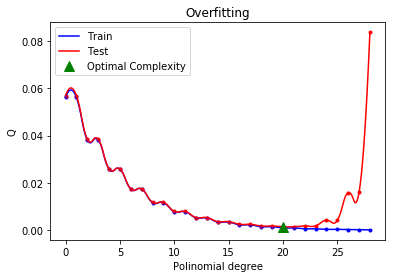

In [2]:
import sklearn.datasets as ds
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline 
from scipy import interpolate
from sklearn.linear_model import Ridge

X = []
y = []

n = 50

for i in range(n):
    x_i = 4.0 * (i / (n-1.0))-2.0
    y_i = 1.0 / (1.0 + 25.0 * (x_i**2))
    
    X.append([x_i])
    y.append([y_i])
    

X_test = []
y_test = []

for i in range(n-2):
    x_i = 4.0 * ((i+0.5) / (n-2.0))-2.0
    y_i = 1.0 / (1.0 + 25.0 * (x_i**2))
    
    X_test.append([x_i])
    y_test.append([y_i])


def getQ(model, X, y, show, color):
    sum = 0.0
    
    y_hat_ans = []
    
    for i in range(len(y)):
        y_hat = model.predict([X[i]])
        sum += (y_hat - y[i])**2
        y_hat_ans.append(y_hat[0])
        
    if show == True:    
        plt.plot(X, y_hat_ans, 'r--', color = color, markersize = 0.2, linestyle = '-')
        plt.show()
            
        
    Q = sum / len(y)
    
    return Q[0]
   

score = []
score_train = []

m = 29
for degree in range(0, m):  
    model = make_pipeline(PolynomialFeatures(degree), linear_model.LinearRegression())
    
    model.fit(X, y)
    
    score_train.append(getQ(model, X, y, False, 'green'))
    score.append(getQ(model, X_test, y_test, False, 'black'))
    
    print('#', end = '')
    
x_axis = list(range(0, m))

score_train = np.asarray(score_train).squeeze()

f1 = interpolate.interp1d(x_axis, score_train, kind = 2)

x_axis_new = np.arange(0, m-1, 0.01)
score_train_new = f1(x_axis_new)

score = np.asarray(score).squeeze()

f2 = interpolate.interp1d(x_axis, score, kind = 2)

x_axis_new = np.arange(0, m-1, 0.01)
score_new = f2(x_axis_new)

index_of_start_overfitting = np.argmin(score)

plt.plot(x_axis, score_train, 'ro', color = 'blue', markersize = 3.0)  
plt.plot(x_axis, score, 'ro', color = 'red', markersize = 3.0) 

plt.plot(x_axis_new, score_train_new, 'r--', color = 'blue', markersize = 0.2,
         linestyle = '-', label = 'Train')    
plt.plot(x_axis_new, score_new, 'r--', color = 'red', markersize = 0.2,
         linestyle = '-', label = 'Test')    

plt.plot(x_axis[index_of_start_overfitting], score[index_of_start_overfitting],
         'g^', color = 'green', markersize = 10.0, label = 'Optimal Complexity')  

plt.legend()

plt.xlabel('Polinomial degree')
plt.ylabel('Q')
plt.title('Overfitting')

plt.show()   